In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as nlg
from tqdm.auto import tqdm

In [2]:
def generate_ginue_matrix(ms):
  A = np.random.normal(mu, sigma, size = (ms, ms)) + 1j * np.random.normal(mu, sigma, size = (ms, ms))
  return A

def generate_ginueH_matrix(ms):
  A = np.random.normal(mu, sigma, size = (ms, ms)) + 1j * np.random.normal(mu, sigma, size = (ms, ms))
  Aconj = np.conjugate(A) #conjugate
  Adag = np.transpose(Aconj) # transpose = dagger
  HS = np.matmul(A,Adag)  #singular value hamiltonian, hermitized hamiltonian
  return HS
###########################################################################################################
def generate_ginoe_matrix(ms):
  A = np.random.normal(mu, sigma, size = (ms, ms))
  return A

def generate_ginoeH_matrix(ms):
  A = np.random.normal(mu, sigma, size = (ms, ms))
  Aconj = np.conjugate(A) #conjugate
  Adag = np.transpose(Aconj) # transpose = dagger
  HS = np.matmul(A,Adag)  #singular value hamiltonian, hermitized hamiltonian
  return HS
###########################################################################################################
def compute_eigenvalues(matrix):
  return np.linalg.eigvals(matrix)

In [22]:
spacing_ratios = []
min_spacing_ratios = []
# Parameters
matrix_size = 100  # Size of the GOE matrix
ens = 1000  # Number of matrices for ensemble averaging
mu, sigma = 0, 1/np.sqrt(2) # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)


for _ in tqdm(range(ens)):
  ginue_HSmatrix = generate_ginueH_matrix(matrix_size)
  seigsGinueH = np.sort(compute_eigenvalues(ginue_HSmatrix)) #sorted eigenvalues of GinUE-hermitized matrix
  for j in range(len(seigsGinueH)-2):
    sratio = (seigsGinueH[j+2]-seigsGinueH[j+1])/(seigsGinueH[j+1]-seigsGinueH[j]) # the open ratio definition
    spacing_ratios.append(sratio)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
e1 = np.array(spacing_ratios).flatten()
#e2 = np.array(singevall).flatten()

In [65]:
##############Formulas of spacing ratios###################################
x = np.linspace(0, 10, 1000)
prgoe = 27*x*(x+1)/(8*(x** 2 + x + 1)**(5/2))
prgue = 81*np.sqrt(3)*x**2*(x+1)**2/(4*np.pi*(x ** 2 + x + 1)**(4))
prpoi = 1/(x+1)**2

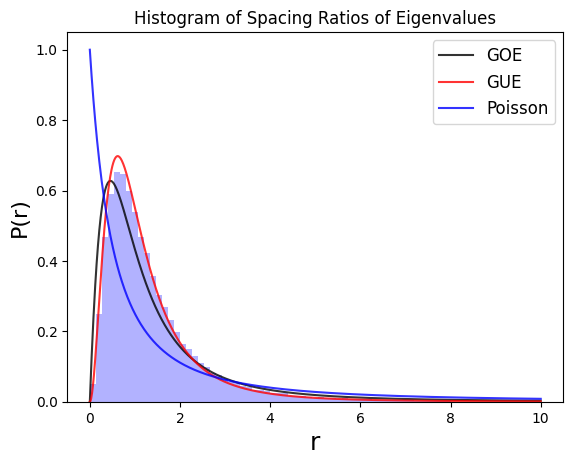

In [17]:
plt.hist(e1.real,range = [0,8],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.plot(x,prgoe,alpha=0.8, color='black')
plt.plot(x,prgue,alpha=0.8, color='red')
plt.plot(x,prpoi,alpha=0.8, color='blue')
plt.xlabel('r', fontsize = 18)
plt.ylabel('P(r)', fontsize = 16)
plt.title('Histogram of Spacing Ratios of Eigenvalues')
# Function add a legend
plt.legend(["GOE", "GUE", "Poisson"], loc ="upper right", fontsize = 12)
plt.grid(False)

In [49]:
############# \tilde {r} ratio of singular values of GinUE matrices ###################

n = 100
Sprd = []

for i in tqdm(range(5000)):  # Python indexing starts at 0, and the upper limit is exclusive
    # Generate a complex Hermitian matrix H0
    H0 = np.random.normal(0, 1/np.sqrt(2), (n, n)) + 1j * np.random.normal(0, 1/np.sqrt(2), (n, n))

    # Compute the square root of the eigenvalues of H0 . H0† (H0 dot its conjugate transpose)
    ev = np.sqrt(nlg.eigvals(H0 @ np.conjugate(H0.T))) #singular values of the GinUE matrix

    # Sort the eigenvalues
    sev = np.sort(ev)

    # Calculate the ratio of successive gaps
    spr = [(sev[j + 1] - sev[j]) / (sev[j] - sev[j - 1]) for j in range(1, n - 2)]

    # Calculate the minimum ratio, considering its reciprocal as well
    rtil = [min(ratio, 1/ratio) for ratio in spr] #general definition of ratio given by Oganesyan and Huse

    # Append the minimum ratio to Sprd
    Sprd.append(rtil)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [50]:
np.real(Sprd)

array([[0.57989861, 0.3341418 , 0.40652363, ..., 0.49601943, 0.55019571,
        0.75544787],
       [0.43942779, 0.76416357, 0.40222854, ..., 0.89193965, 0.99031142,
        0.51547011],
       [0.69460785, 0.64254803, 0.99797167, ..., 0.74157596, 0.78691805,
        0.40226833],
       ...,
       [0.50955817, 0.31063475, 0.55828973, ..., 0.54540809, 0.54622981,
        0.1852163 ],
       [0.97749863, 0.40259805, 0.64384228, ..., 0.49451766, 0.54476996,
        0.70495495],
       [0.36884416, 0.82195372, 0.3108264 , ..., 0.55078947, 0.59667462,
        0.64233258]])

In [51]:
e1 = np.array(np.real(Sprd)).flatten()

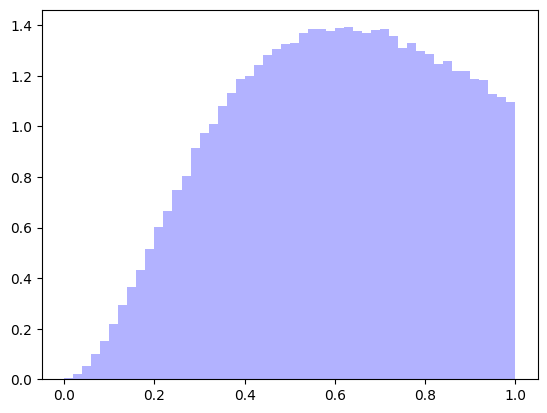

In [52]:
plt.hist(np.real(e1),range = [0,1],  bins=50, density=True, alpha=0.3, color='blue')
plt.grid(False)

In [53]:
############# \tilde {r} ratio of singular values of GinOE matrices ###################

n = 100
Sprd = []

for i in tqdm(range(5000)):  # Python indexing starts at 0, and the upper limit is exclusive
    # Generate a complex Hermitian matrix H0
    H0 = np.random.normal(0, 1/np.sqrt(2), (n, n))

    # Compute the square root of the eigenvalues of H0 . H0† (H0 dot its conjugate transpose)
    ev = np.sqrt(nlg.eigvals(H0 @ np.conjugate(H0.T))) #singular values of the GinUE matrix

    # Sort the eigenvalues
    sev = np.sort(ev)

    # Calculate the ratio of successive gaps
    spr = [(sev[j + 1] - sev[j]) / (sev[j] - sev[j - 1]) for j in range(1, n - 2)]

    # Calculate the minimum ratio, considering its reciprocal as well
    rtil = [min(ratio, 1/ratio) for ratio in spr] #general definition of ratio given by Oganesyan and Huse

    # Append the minimum ratio to Sprd
    Sprd.append(rtil)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [54]:
e2 = np.array(np.real(Sprd)).flatten()

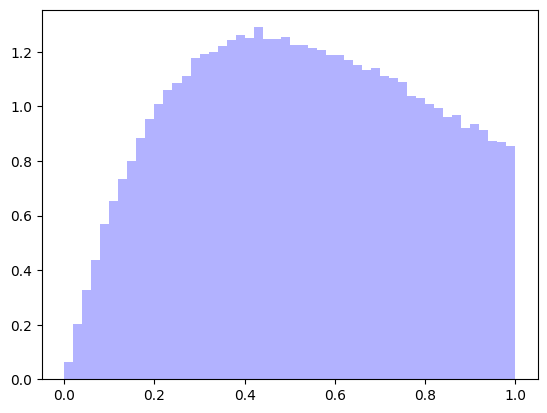

In [58]:
plt.hist(e2,range = [0,],  bins=50, density=True, alpha=0.3, color='blue')
plt.grid(False)

In [61]:
# @title GinOE-GinUE crossover

In [75]:
n = 100
lmbda = 0.07
Sprd = []
Sprall = []

for i in tqdm(range(1000)):  # Python indexing starts at 0, and the upper limit is exclusive
    # Generate a complex Hermitian matrix H0
    Hginoe = np.random.normal(0, 1/np.sqrt(2), (n, n))
    Hginue = np.random.normal(0, 1/np.sqrt(2), (n, n)) + 1j * np.random.normal(0, 1/np.sqrt(2), (n, n))

    # crossover pandey Mehta Hamiltonian
    H = (1/np.sqrt(1 + lmbda**2)) * Hginoe + (lmbda/np.sqrt(1+lmbda**2)) * Hginue

    # Compute the square root of the eigenvalues of H0 . H0† (H0 dot its conjugate transpose)
    ev = np.sqrt(nlg.eigvals(H @ np.conjugate(H.T))) #singular values of the GinUE matrix

    # Sort the eigenvalues
    sev = np.sort(ev)

    # Calculate the ratio of successive gaps
    spr = [(sev[j + 1] - sev[j]) / (sev[j] - sev[j - 1]) for j in range(1, n - 2)]

    Sprall.append(spr)

    # Calculate the minimum ratio, considering its reciprocal as well
    rtil = [min(ratio, 1/ratio) for ratio in spr] #general definition of ratio given by Oganesyan and Huse

    # Append the minimum ratio to Sprd
    Sprd.append(rtil)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [76]:
e3 = np.array(Sprall).flatten()
e4 = np.array(Sprd).flatten()

In [70]:
# @title lmbda = 0.0, GOE statistics matches with the ratio distribution of the singular values of GinOE


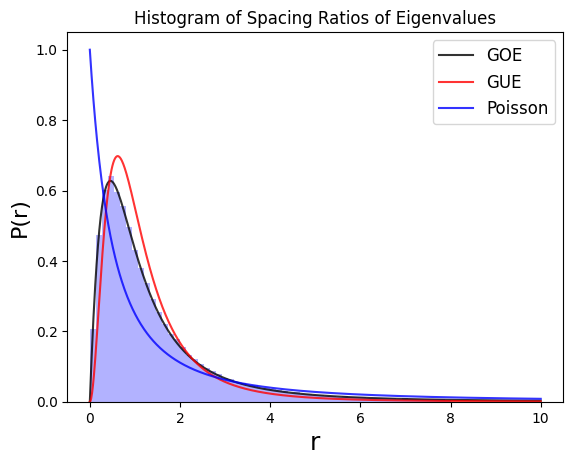

In [67]:
plt.hist(np.real(e3),range = [0,8],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.plot(x,prgoe,alpha=0.8, color='black')
plt.plot(x,prgue,alpha=0.8, color='red')
plt.plot(x,prpoi,alpha=0.8, color='blue')
plt.xlabel('r', fontsize = 18)
plt.ylabel('P(r)', fontsize = 16)
plt.title('Histogram of Spacing Ratios of Eigenvalues')
# Function add a legend
plt.legend(["GOE", "GUE", "Poisson"], loc ="upper right", fontsize = 12)
plt.grid(False)

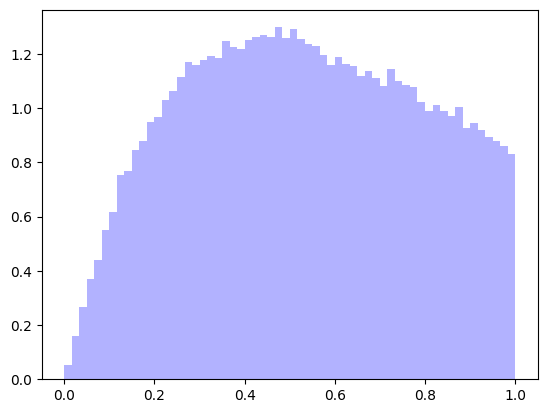

In [69]:
plt.hist(np.real(e4),range = [0,1],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.grid(False)

In [ ]:
# @title lmbda = 0.03, GOE-GUE intermediate statistics matches with the ratio distribution of the singular values of GinOE


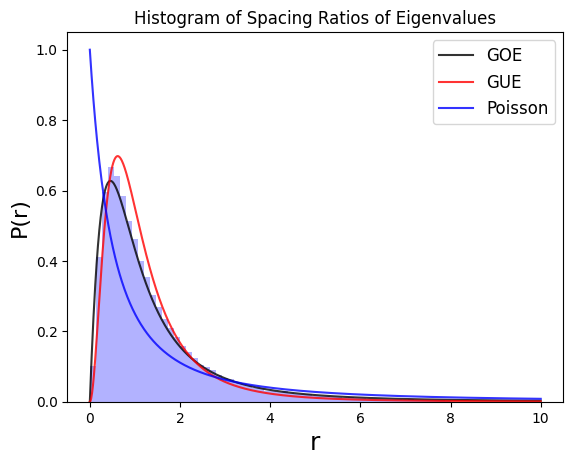

In [73]:
plt.hist(np.real(e3),range = [0,8],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.plot(x,prgoe,alpha=0.8, color='black')
plt.plot(x,prgue,alpha=0.8, color='red')
plt.plot(x,prpoi,alpha=0.8, color='blue')
plt.xlabel('r', fontsize = 18)
plt.ylabel('P(r)', fontsize = 16)
plt.title('Histogram of Spacing Ratios of Eigenvalues')
# Function add a legend
plt.legend(["GOE", "GUE", "Poisson"], loc ="upper right", fontsize = 12)
plt.grid(False)

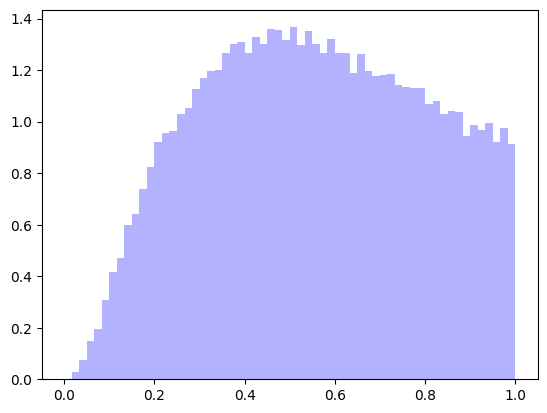

In [74]:
plt.hist(np.real(e4),range = [0,1],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.grid(False)

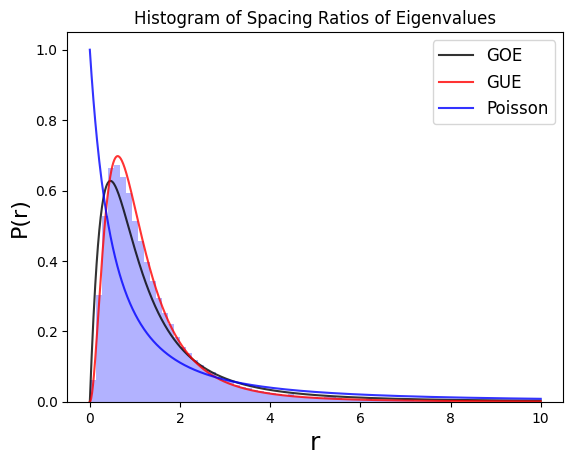

In [77]:
plt.hist(np.real(e3),range = [0,8],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.plot(x,prgoe,alpha=0.8, color='black')
plt.plot(x,prgue,alpha=0.8, color='red')
plt.plot(x,prpoi,alpha=0.8, color='blue')
plt.xlabel('r', fontsize = 18)
plt.ylabel('P(r)', fontsize = 16)
plt.title('Histogram of Spacing Ratios of Eigenvalues')
# Function add a legend
plt.legend(["GOE", "GUE", "Poisson"], loc ="upper right", fontsize = 12)
plt.grid(False)

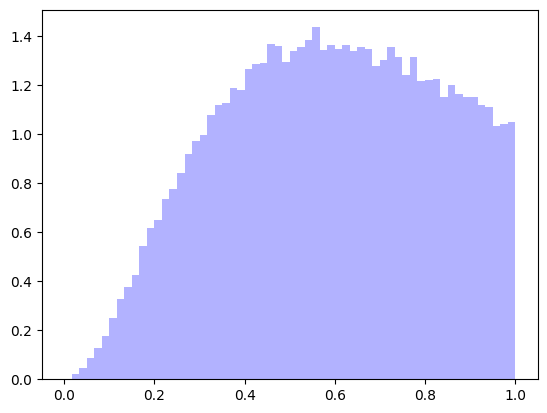

In [78]:
plt.hist(np.real(e4),range = [0,1],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.grid(False)